In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [9]:
for city in cities:
    print(city)

muramvya
saint-francois
ushuaia
ahipara
port elizabeth
saleaula
caceres
luis correia
sorland
rikitea
east london
korla
belushya guba
atbasar
ust-kulom
lasa
arman
kumeny
hobart
khatanga
mokhsogollokh
cape town
alofi
muli
arkhangelskoye
coquimbo
barentsburg
griffith
mataura
bluff
attawapiskat
karaton
raudeberg
saint-philippe
punta arenas
impfondo
bosaso
egvekinot
victor harbor
cap malheureux
escada
hithadhoo
kalmunai
vaini
illoqqortoormiut
praia
khandbari
kaitangata
albany
puerto ayora
mednogorskiy
evensk
blairmore
yumen
mys shmidta
jamestown
tutoia
bredasdorp
meulaboh
mehamn
chiredzi
takoradi
matara
hilo
praia da vitoria
maymyo
broken hill
avarua
samusu
airai
quatre cocos
busselton
suntar
tabiauea
warrington
longyearbyen
severo-kurilsk
katsuura
warqla
anori
thunder bay
victoria
surt
barrow
port alfred
chapais
hermanus
vardo
atuona
new norfolk
dhidhdhoo
vigrestad
belaya gora
souillac
thompson
bengkulu
taolanaro
qaanaaq
kapaa
saint george
tasiilaq
pingliang
byron bay
la ronge
maningrida
k

In [ ]:
# # Create a practice set of random latitude and longitude combinations.
# lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
# lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
# lat_lngs = zip(lats, lngs)

In [ ]:
# # Add the latitudes and longitudes to a list.
# coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-42.264151984809 -18.247681977613126
-20.120421362434953 104.56894912649273
-85.16009357690392 -43.63861645245498
27.803422126606392 31.253048700293476
32.99820506031 -119.2249473377108
-43.25326687144689 172.92241627797426
-82.7499361977991 158.96921291285054
-31.548610634638436 -54.42042112747821
54.671432598508346 -172.55554492596752
-62.12598814383294 38.77258123901885
38.92577302191734 -87.59091319078534
70.44184305622468 -42.66348407144301
88.151712092053 92.07522866987614
33.771286446086094 -59.03348470907292
-40.10824174431319 79.75566420337083
23.428002400962967 -84.81935518141982
-39.58207222500435 104.92880684653028
-83.57787886063078 -174.98899974780005
-55.82087269553828 163.12154585886157
-53.60253803262735 -112.63674592654166
-21.65146618494157 170.98825022116932
-81.01121711582458 77.35894581866916
-67.35628697603306 -11.509946956201162
-67.24778349367894 144.62517150469165
-46.34905625926819 53.07238782390479
60.18466370693821 -133.37346213328084
-83.55697278096684 -12

4.211072544795513 -85.20616868254638
-25.16234232667132 -30.92466514741031
4.121698735023941 134.16715090580323
-55.87689807260773 66.87636487217955
-33.11120818084809 -30.981588997229835
12.590855125879997 -168.08776373777314
-62.5657202236478 -116.5828768903252
-27.140789583411554 115.63014299852267
-64.97601682572572 -138.10106872310155
49.84893562518923 58.56249274689242
-56.098449643426115 60.133770890411085
43.92254488810309 137.45695358263936
-58.664229203846446 157.38647700852238
74.48228332054131 -15.175961564803941
62.29688815344926 106.50132222663706
-34.86636335183092 -17.95012067699392
-47.03307077289963 -153.08693316905482
29.93662757697922 82.43872757637212
60.93883810102898 -167.66950514925804
-75.58077810936697 89.54625182833769
-30.854749361036355 -55.68043581589632
-88.98697818852627 137.16238552382873
-66.01400192036118 164.10600602496334
72.11644081170263 149.37281894562625
-13.16692266866643 -137.2400345262078
-47.74585863904596 156.29350293375148
5.28656486640188

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | muramvya
Processing Record 2 of Set 1 | saint-francois
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | ahipara
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | saleaula
City not found. Skipping...
Processing Record 7 of Set 1 | caceres
Processing Record 8 of Set 1 | luis correia
Processing Record 9 of Set 1 | sorland
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | korla
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | atbasar
Processing Record 15 of Set 1 | ust-kulom
Processing Record 16 of Set 1 | lasa
Processing Record 17 of Set 1 | arman
Processing Record 18 of Set 1 | kumeny
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | mokhsogollokh
Processing Record 22 o

Processing Record 38 of Set 4 | tiznit
Processing Record 39 of Set 4 | eureka
Processing Record 40 of Set 4 | luderitz
Processing Record 41 of Set 4 | vao
Processing Record 42 of Set 4 | padang
Processing Record 43 of Set 4 | tual
Processing Record 44 of Set 4 | elat
Processing Record 45 of Set 4 | midland
Processing Record 46 of Set 4 | codrington
Processing Record 47 of Set 4 | vetluga
Processing Record 48 of Set 4 | yellowknife
Processing Record 49 of Set 4 | provideniya
Processing Record 50 of Set 4 | carutapera
Processing Record 1 of Set 5 | altay
Processing Record 2 of Set 5 | butaritari
Processing Record 3 of Set 5 | wajima
Processing Record 4 of Set 5 | mackenzie
Processing Record 5 of Set 5 | neuquen
Processing Record 6 of Set 5 | cherskiy
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 | qaqortoq
Processing Record 9 of Set 5 | kaspiysk
Processing Record 10 of Set 5 | beringovskiy
Processing Record 11 of Set 5 | cotui
Processing Record 12 of Set 5 | kristians

Processing Record 30 of Set 8 | jabiru
City not found. Skipping...
Processing Record 31 of Set 8 | aripuana
Processing Record 32 of Set 8 | ambatondrazaka
Processing Record 33 of Set 8 | maragogi
Processing Record 34 of Set 8 | mar del plata
Processing Record 35 of Set 8 | arraial do cabo
Processing Record 36 of Set 8 | ancud
Processing Record 37 of Set 8 | dawson
Processing Record 38 of Set 8 | robertsport
Processing Record 39 of Set 8 | katobu
Processing Record 40 of Set 8 | nemuro
Processing Record 41 of Set 8 | ternate
Processing Record 42 of Set 8 | shimoda
Processing Record 43 of Set 8 | hunza
City not found. Skipping...
Processing Record 44 of Set 8 | coari
Processing Record 45 of Set 8 | ust-kuyga
Processing Record 46 of Set 8 | agadez
Processing Record 47 of Set 8 | guarapari
Processing Record 48 of Set 8 | rocha
Processing Record 49 of Set 8 | jinji
Processing Record 50 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 1 of Set 9 | ulagan
Processing Record 2 o

Processing Record 13 of Set 12 | naantali
Processing Record 14 of Set 12 | lac du bonnet
Processing Record 15 of Set 12 | ylojarvi
Processing Record 16 of Set 12 | kenai
Processing Record 17 of Set 12 | camana
Processing Record 18 of Set 12 | visby
Processing Record 19 of Set 12 | halalo
City not found. Skipping...
Processing Record 20 of Set 12 | bathsheba
Processing Record 21 of Set 12 | nangomba
Processing Record 22 of Set 12 | komsomolskiy
Processing Record 23 of Set 12 | barbar
City not found. Skipping...
Processing Record 24 of Set 12 | aklavik
Processing Record 25 of Set 12 | priyutnoye
Processing Record 26 of Set 12 | catia la mar
Processing Record 27 of Set 12 | goderich
Processing Record 28 of Set 12 | satitoa
City not found. Skipping...
Processing Record 29 of Set 12 | alyangula
Processing Record 30 of Set 12 | porbandar
Processing Record 31 of Set 12 | ekhabi
Processing Record 32 of Set 12 | mandali
Processing Record 33 of Set 12 | owando
Processing Record 34 of Set 12 | pa

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muramvya,-3.2682,29.6079,62.96,57,93,2.66,BI,2022-07-17 16:33:42
1,Saint-Francois,46.4154,3.9054,89.04,23,0,11.50,FR,2022-07-17 16:33:42
2,Ushuaia,-54.8000,-68.3000,42.46,52,40,10.36,AR,2022-07-17 16:33:03
3,Ahipara,-35.1667,173.1667,48.13,84,91,5.28,NZ,2022-07-17 16:33:43
4,Port Elizabeth,-33.9180,25.5701,77.09,36,0,2.30,ZA,2022-07-17 16:33:43
5,Caceres,39.5220,-6.3748,107.33,8,40,10.76,ES,2022-07-17 16:33:01
6,Luis Correia,-2.8792,-41.6669,91.40,62,40,10.36,BR,2022-07-17 16:33:44
7,Sorland,67.6670,12.6934,53.46,77,80,13.78,NO,2022-07-17 16:33:44
8,Rikitea,-23.1203,-134.9692,73.96,78,100,16.46,PF,2022-07-17 16:33:44
9,East London,-33.0153,27.9116,68.94,52,0,6.91,ZA,2022-07-17 16:33:45


In [26]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Muramvya,BI,2022-07-17 16:33:42,-3.2682,29.6079,62.96,57,93,2.66
1,Saint-Francois,FR,2022-07-17 16:33:42,46.4154,3.9054,89.04,23,0,11.50
2,Ushuaia,AR,2022-07-17 16:33:03,-54.8000,-68.3000,42.46,52,40,10.36
3,Ahipara,NZ,2022-07-17 16:33:43,-35.1667,173.1667,48.13,84,91,5.28
4,Port Elizabeth,ZA,2022-07-17 16:33:43,-33.9180,25.5701,77.09,36,0,2.30


In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

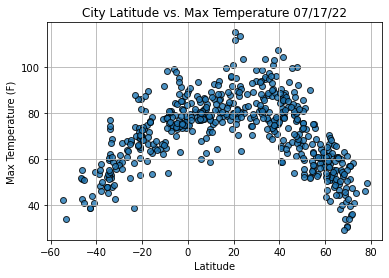

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

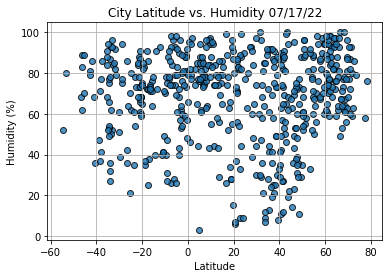

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

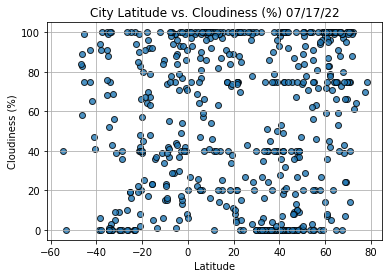

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

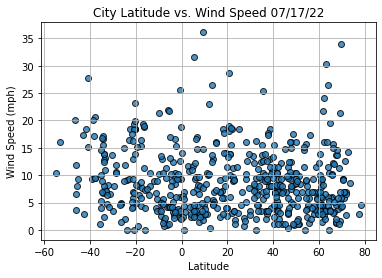

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City                         Lasa
Country                        IT
Date          2022-07-17 16:33:46
Lat                       46.6166
Lng                       10.7002
Max Temp                    86.88
Humidity                       53
Cloudiness                     18
Wind Speed                   0.36
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
545     True
546     True
547     True
548    False
549    False
Name: Lat, Length: 550, dtype: bool

In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Saint-Francois,FR,2022-07-17 16:33:42,46.4154,3.9054,89.04,23,0,11.50
5,Caceres,ES,2022-07-17 16:33:01,39.5220,-6.3748,107.33,8,40,10.76
7,Sorland,NO,2022-07-17 16:33:44,67.6670,12.6934,53.46,77,80,13.78
10,Korla,CN,2022-07-17 16:31:28,41.7597,86.1469,80.35,27,49,5.26
11,Atbasar,KZ,2022-07-17 16:33:45,51.8000,68.3333,73.13,58,78,8.43


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

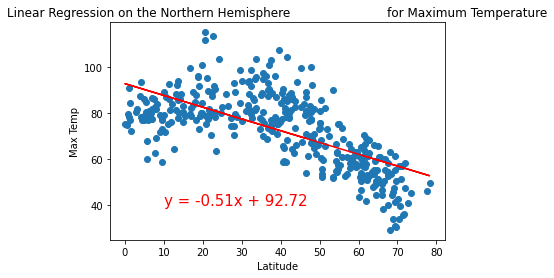

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

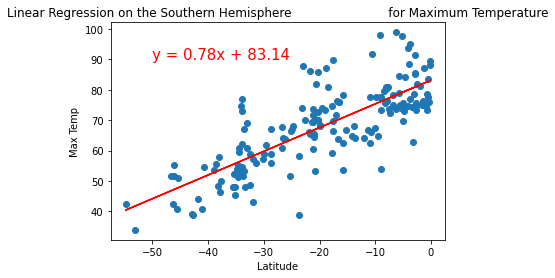

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

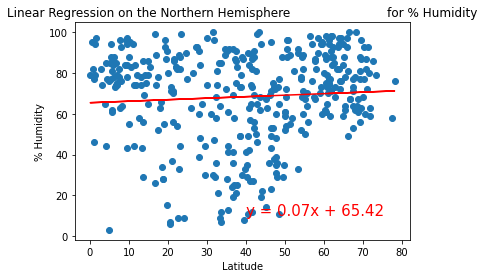

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

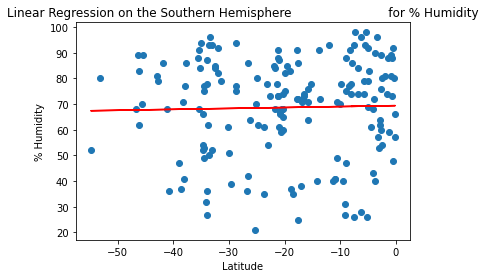

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

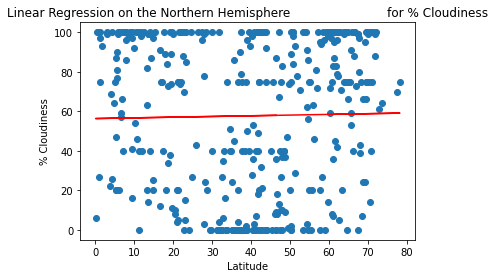

In [45]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

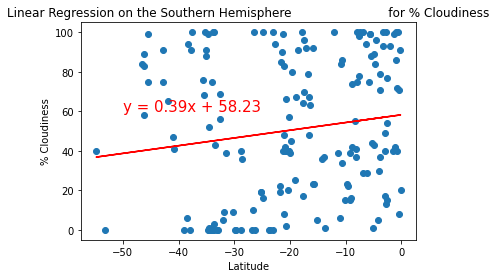

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

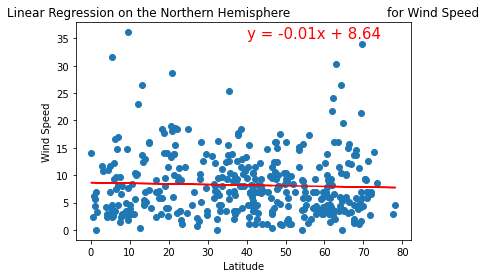

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

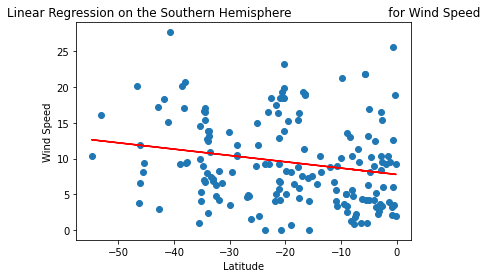

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))